<a href="https://colab.research.google.com/github/RashaAlshawi/Dual-Attention-U-Net-with-Feature-Infusion-Pushing-the-Boundaries-of-Multiclass-Defect-Segmentation/blob/main/Filters_FeatureExtractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.filters import gabor
from skimage import color
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
X_P=np.load('/content/drive/MyDrive/VideoFrames/PositiveImageNew.npy')
y_P=np.load('/content/drive/MyDrive/VideoFrames/PositivemaskNew.npy')

In [ ]:
# @title Gabor without mask
def extract_gabor_features_cv2(images_array):
    # Create an empty list to store the Gabor filter responses for each image
    gabor_responses = []

    # Define Gabor filter parameters
    frequency = 0.2
    theta = np.pi / 5
    bandwidth = 2.5
    sigma = 8.0

    # Create a Gabor kernel using cv2.getGaborKernel
    g_kernel = cv2.getGaborKernel((3, 3), sigma, theta, frequency, bandwidth)

    # Loop through each image in the images_array
    for image in images_array:
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        # Apply the Gabor kernel to the grayscale image
        gabor_response = cv2.filter2D(gray_image, cv2.CV_64F, g_kernel)

        # Append the Gabor filter response to the list
        gabor_responses.append(gabor_response)

    # Convert the list of Gabor filter responses to a numpy array
    gabor_responses = np.array(gabor_responses)

    return gabor_responses


In [ ]:
# @title Gabor With mask
def extract_gabor_features_cv2(images_array, masks_array):
    gabor_responses = []

    # Define Gabor filter parameters
    frequency = 0.2
    theta = np.pi / 5
    bandwidth = 2.5
    sigma = 8.0

    # Create a Gabor kernel using cv2.getGaborKernel
    g_kernel = cv2.getGaborKernel((3, 3), sigma, theta, frequency, bandwidth)

    # Loop through each image and its corresponding mask in the input arrays
    for image, mask in zip(images_array, masks_array):
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        # Apply the Gabor kernel to the grayscale image
        gabor_response = cv2.filter2D(gray_image, cv2.CV_64F, g_kernel)

        # Mask the Gabor response using the corresponding mask
        gabor_response_masked = gabor_response * mask

        gabor_responses.append(gabor_response_masked)

    gabor_responses = np.array(gabor_responses)

    return gabor_responses


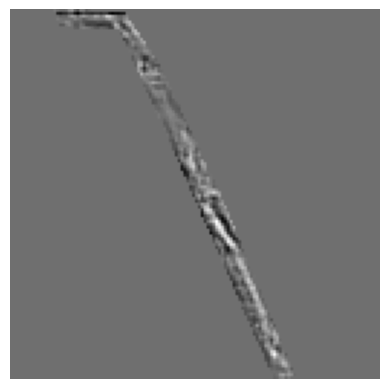

(-0.5, 127.5, 127.5, -0.5)

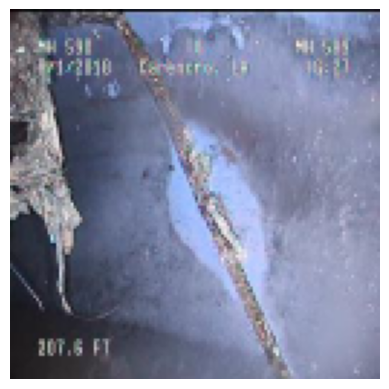

In [ ]:
"""With Mask"""
gabor_responses = extract_gabor_features_cv2(X_P,y_P)
# Plot the Gabor filter response for the first image (index 0)
i=0
plt.imshow(gabor_responses[i], cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(X_P[i])
plt.axis('off')

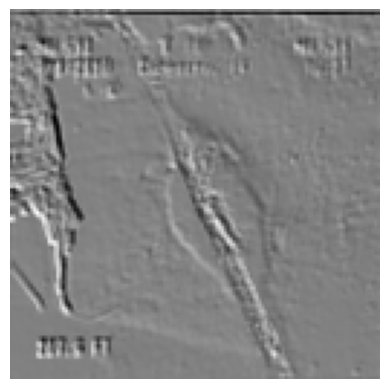

(-0.5, 127.5, 127.5, -0.5)

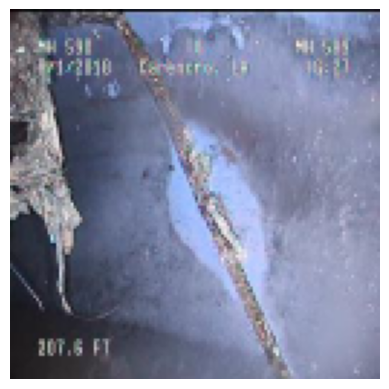

In [ ]:
# Plot the Gabor filter response for the first image (index 0)
i=0
gabor_responses_= extract_gabor_features_cv2(X_P)

plt.imshow(gabor_responses_[i], cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(X_P[i])
plt.axis('off')

In [ ]:
#@title Canny Without Mask
def extract_canny_features_cv2(images_array):
    # Create an empty list to store the Canny edge responses for each image
    canny_responses = []

    # Define Canny edge detection parameters
    low_threshold = 50
    high_threshold = 150

    # Loop through each image in the images_array
    for image in images_array:
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        # Apply the Canny edge detection algorithm to the grayscale image
        canny_response = cv2.Canny(gray_image, low_threshold, high_threshold)

        # Append the Canny edge response to the list
        canny_responses.append(canny_response)

    canny_responses = np.array(canny_responses)

    return canny_responses


In [ ]:
#@title Canny with Mask
def extract_canny_features_cv2(images_array, masks_array):
    # Create an empty list to store the Canny edge responses for each image
    canny_responses = []

    # Define Canny edge detection parameters
    low_threshold = 50
    high_threshold = 150

    for image, mask in zip(images_array, masks_array):
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        # Apply the mask to the grayscale image
        masked_gray_image = gray_image * mask

        # Apply the Canny edge detection algorithm to the masked grayscale image
        canny_response = cv2.Canny(masked_gray_image, low_threshold, high_threshold)

        # Append the Canny edge response to the list
        canny_responses.append(canny_response)

    canny_responses = np.array(canny_responses)

    return canny_responses


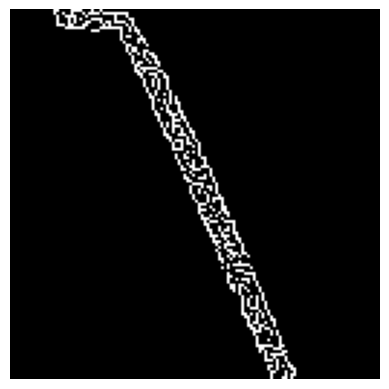

(-0.5, 127.5, 127.5, -0.5)

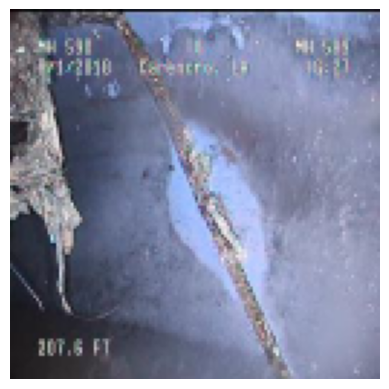

In [ ]:
# Wit Mask
canny_responses = extract_canny_features_cv2(X_P,y_P)
i=0
plt.imshow(canny_responses[i], cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(X_P[i])
plt.axis('off')



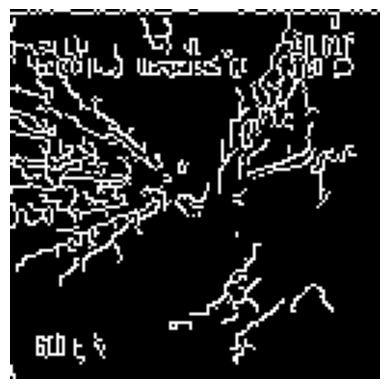

(-0.5, 127.5, 127.5, -0.5)

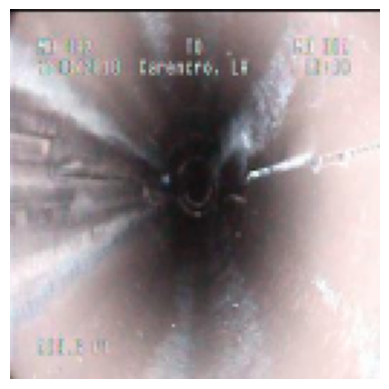

In [ ]:
# Without Mask
canny_responses = extract_canny_features_cv2(X_P)
i=1
plt.imshow(canny_responses[i], cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(X_P[i])
plt.axis('off')



In [ ]:
#@title Sobel without mask
def extract_sobel_features_cv2(images_array):
    # Create an empty list to store the Sobel filter responses for each image
    sobel_responses = []

    for image in images_array:
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        # Apply Sobel filter to the grayscale image
        sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

        # Calculate the gradient magnitude
        sobel_response = np.sqrt(sobel_x**2 + sobel_y**2)

        # Append the Sobel filter response to the list
        sobel_responses.append(sobel_response)

    sobel_responses = np.array(sobel_responses)

    return sobel_responses


In [ ]:
#@title Sobel with mask


def extract_sobel_features_cv2(images_array, masks_array):
    sobel_responses = []

    # Loop through each image and its corresponding mask in the input arrays
    for image, mask in zip(images_array, masks_array):
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        masked_gray_image = gray_image * mask

        # Apply Sobel filter to the masked grayscale image
        sobel_x = cv2.Sobel(masked_gray_image, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(masked_gray_image, cv2.CV_64F, 0, 1, ksize=3)

        # Calculate the gradient magnitude
        sobel_response = np.sqrt(sobel_x**2 + sobel_y**2)

        # Append the Sobel filter response to the list
        sobel_responses.append(sobel_response)

    sobel_responses = np.array(sobel_responses)

    return sobel_responses


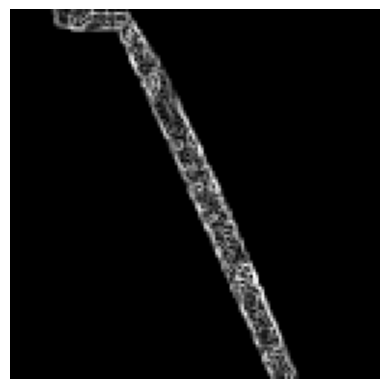

(-0.5, 127.5, 127.5, -0.5)

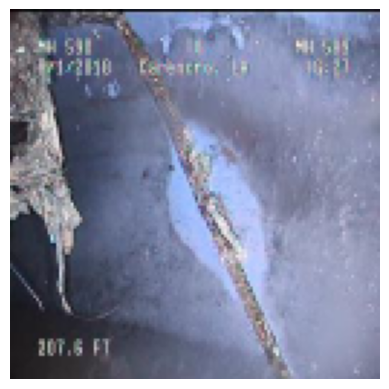

In [ ]:
#With Mask
sobel_responses = extract_sobel_features_cv2(X_P,y_P)
i=0
plt.imshow(sobel_responses[i], cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(X_P[i])
plt.axis('off')



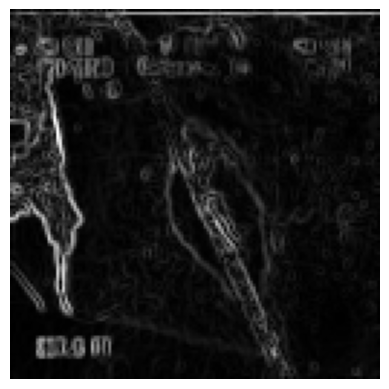

(-0.5, 127.5, 127.5, -0.5)

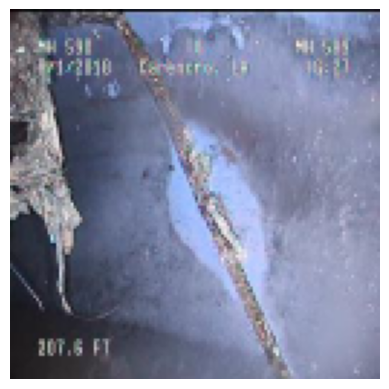

In [ ]:
#Without Mask
sobel_responses = extract_sobel_features_cv2(X_P)
i=0
plt.imshow(sobel_responses[i], cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(X_P[i])
plt.axis('off')



In [ ]:
sobel_responses.shape,gabor_responses_cv2.shape,canny_responses.shape

((3205, 128, 128), (3205, 128, 128), (3205, 128, 128))

In [ ]:
#@title Samples Visualization

In [ ]:
gabor_responses_exp = np.expand_dims(gabor_responses, axis=-1)  # New shape: (2244, 128, 128, 1)
canny_responses_exp=np.expand_dims(canny_responses, axis=-1)  # New shape: (2244, 128, 128, 1)
sobel_responses_exp=np.expand_dims(sobel_responses, axis=-1)  # New shape: (2244, 128, 128, 1)
#input_tensor = np.concatenate([X_P, gabor_responses_exp,canny_responses_exp,sobel_responses_exp], axis=-1)

In [ ]:
input_tensor = np.concatenate([X_P, gabor_responses_exp,canny_responses_exp,sobel_responses_exp], axis=-1)

In [ ]:
input_tensor_ = np.concatenate([gabor_responses_exp,canny_responses_exp,sobel_responses_exp], axis=-1)

In [ ]:
input_tensor_.shape

(5051, 128, 128, 3)

In [ ]:
np.save('/content/drive/MyDrive/VideoFrames/input_tensor_New.npy', input_tensor_)

In [ ]:
np.save('/content/input_tensor_New.npy', input_tensor_)

In [ ]:
X_P.shape,gabor_responses_cv2.shape

((2244, 128, 128, 3), (2244, 128, 128))

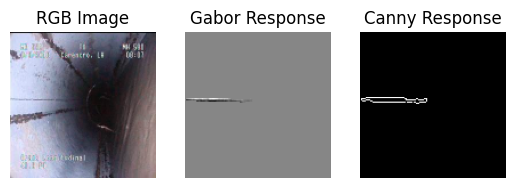

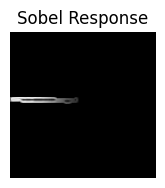

In [ ]:
def plot_features(input_tensor):
    # Extract the first image from the array
    first_image = input_tensor[4]

    # Split the image into RGB channels, Gabor filter response, and Canny edge response
    rgb_image = first_image[:, :, :3]  # First three channels are RGB
    gabor_response = first_image[:, :, 3]  # Fourth channel is the Gabor filter response
    canny_response = first_image[:, :, 4]  # Fifth channel is the Canny edge response
    sobel_responses= first_image[:, :, 5] # Fifth channel is the Canny edge response

    # Normalize the RGB channels to [0, 1]
    rgb_image_normalized = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())

    # Plot the RGB image
    plt.subplot(1, 3, 1)
    plt.imshow(rgb_image_normalized)
    plt.title('RGB Image')
    plt.axis('off')

    # Plot the Gabor filter response
    plt.subplot(1, 3, 2)
    plt.imshow(gabor_response, cmap='gray')
    plt.title('Gabor Response')
    plt.axis('off')

    # Plot the Canny edge response
    plt.subplot(1, 3, 3)
    plt.imshow(canny_response, cmap='gray')
    plt.title('Canny Response')
    plt.axis('off')

    plt.show()
    # Plot the Sobel edge response
    plt.subplot(1, 3, 3)
    plt.imshow(sobel_responses, cmap='gray')
    plt.title('Sobel Response')
    plt.axis('off')

    plt.show()
plot_features(input_tensor)
